In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [259]:
df_1=pd.read_csv(r'fear_greed_index.csv')
df_2=pd.read_csv(r"historical_data.csv")

In [260]:
df_1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [261]:
df_1

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [262]:
df_2[df_2['Timestamp'] == 1517722200]

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp


In [263]:
df_2['Date_Time']=pd.to_datetime(df_2['Timestamp'], unit='ms')

In [264]:
df_2['Date']=df_2.Date_Time.dt.date

In [265]:
df_2

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date_Time,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-06-15 15:06:40,2025-06-15
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-06-15 15:06:40,2025-06-15
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-06-15 15:06:40,2025-06-15
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-06-15 15:06:40,2025-06-15


In [273]:
df_1['Date']=pd.to_datetime(df_1['date'])

In [275]:
df_1.Date[0]

Timestamp('2018-02-01 00:00:00')

In [276]:
df_1[df_1['Date'].isin(df_2['Date'])]

C:\Users\Acer.DESKTOP-TSARLU6\AppData\Local\Temp\ipykernel_31664\3050510411.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_1[df_1['Date'].isin(df_2['Date'])]


,timestamp,value,classification,date,Date
1878,1679981400,59,Greed,2023-03-28,2023-03-28
2109,1699939800,69,Greed,2023-11-14,2023-11-14
2225,1709962200,84,Extreme Greed,2024-03-09,2024-03-09
2341,1719984600,50,Neutral,2024-07-03,2024-07-03
2456,1730007000,74,Greed,2024-10-27,2024-10-27
2571,1739943000,44,Fear,2025-02-19,2025-02-19


In [277]:
df_1.date[0]

'2018-02-01'

In [278]:
df_2.Date[0]

datetime.date(2024, 10, 27)

In [279]:
df_1['Date']=pd.to_datetime(df_1['date'])

In [280]:
df_1['Date']=df_1['Date'].dt.date

In [281]:
df=pd.merge(df_1, df_2, left_on='Date', right_on='Date')

In [282]:
df.head()

,timestamp,value,classification,date,Date,Account,Coin,Execution Price,Size Tokens,Size USD,...,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date_Time
0,1679981400,59,Greed,2023-03-28,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,...,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-03-28 10:40:00
1,1679981400,59,Greed,2023-03-28,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,...,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-03-28 10:40:00
2,1679981400,59,Greed,2023-03-28,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,...,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-03-28 10:40:00
3,1699939800,69,Greed,2023-11-14,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,...,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,1.700000e+12,2023-11-14 22:13:20
4,1699939800,69,Greed,2023-11-14,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,...,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,1.700000e+12,2023-11-14 22:13:20


In [283]:
df.columns

Index(['timestamp', 'value', 'classification', 'date', 'Date', 'Account',
       'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date_Time'],
      dtype='object')

In [284]:
df.drop(columns=['timestamp','date','Timestamp'],inplace=True)

In [285]:
df.drop(columns='Timestamp IST',inplace=True)

In [286]:
df.head()

,value,classification,Date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Date_Time
0,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
1,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
2,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
3,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,2023-11-14 22:13:20
4,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,2023-11-14 22:13:20


# Basic Info Analysis

In [287]:
print(df.shape)
print(df['Account'].nunique())
print(df.info())
print(df.describe())

print(df.isnull().sum())

print(df['classification'].value_counts())
print(df['Coin'].value_counts())
print(df['Side'].value_counts())
print(df['Direction'].value_counts())

(184263, 18)
32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184263 entries, 0 to 184262
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   value             184263 non-null  int64         
 1   classification    184263 non-null  object        
 2   Date              184263 non-null  object        
 3   Account           184263 non-null  object        
 4   Coin              184263 non-null  object        
 5   Execution Price   184263 non-null  float64       
 6   Size Tokens       184263 non-null  float64       
 7   Size USD          184263 non-null  float64       
 8   Side              184263 non-null  object        
 9   Start Position    184263 non-null  float64       
 10  Direction         184263 non-null  object        
 11  Closed PnL        184263 non-null  float64       
 12  Transaction Hash  184263 non-null  object        
 13  Order ID          184263 non-null  int64   

# Performance Analysis

In [288]:
pnl_by_sentiment=df.groupby('classification')['Closed PnL'].agg(['mean','std','count']).round()
print("PnL Performance by Market Sentiment:")
pnl_by_sentiment

PnL Performance by Market Sentiment:


,mean,std,count
classification,,,
Extreme Greed,25.0,306.0,6962
Fear,50.0,909.0,133871
Greed,88.0,1148.0,36289
Neutral,22.0,634.0,7141


- mean → average profit/loss per trade under that sentiment.
E.g. during Greed, average trade PnL = 88 (highest).
During Neutral, average trade PnL = only 22 (lowest).
- std (standard deviation) → volatility/risk of PnL under that sentiment.
Higher std = more inconsistent results.
Fear (909) and Greed (1148) have much higher risk/variance than Extreme Greed (306).
- count → number of trades observed under that sentiment.
Most trades happened under Fear (133,871) → it dominates your dataset.
Fewest in Extreme Greed (6,962) and Neutral (7,141).

### Analysis:
- Greed sentiment had the highest average PnL (+88), but also the highest risk (std 1148).
- Fear also had positive average PnL (+50), with lots of trades, but still very volatile (std 909).
- Extreme Greed gave small gains (+25) but with lower volatility (std 306) → more stable.
- Neutral had the lowest mean (+22), still positive but weak and inconsistent (std 634).

In [289]:
df['is_profitable']=df['Closed PnL']>0
win_rate_setiment=df.groupby('classification')['is_profitable'].mean()
print("\nWin Rate by Sentiment:")
win_rate_setiment


Win Rate by Sentiment:


classification
Extreme Greed    0.490089
Fear             0.415146
Greed            0.446471
Neutral          0.317182
Name: is_profitable, dtype: float64

- Extreme Greed → 0.49 → ~49% of trades were profitable.
- Fear → 0.415 → ~41.5% win rate.
- Greed → 0.446 → ~44.6% win rate.
- Neutral → 0.317 → ~31.7% win rate.

### Analyis:
- Trades taken when the market sentiment was Extreme Greed had the highest win rate (~49%), but still below 50% (not consistently profitable).
- Neutral sentiment had the worst win rate (~32%), meaning most trades taken in neutral conditions lost money.

# Trading Behavior by Sentiment

In [290]:
size_by_sentiment=df.groupby('classification')['Size USD'].agg(['mean','median'])
print("Trade Size by Sentiment:")
print(size_by_sentiment)

Trade Size by Sentiment:
                       mean    median
classification                       
Extreme Greed   5660.265764  1148.635
Fear            5259.977837   605.070
Greed           3182.883845   499.940
Neutral         3058.848110   554.160


- mean → the average trade size during each sentiment.
- median → the middle trade size (less sensitive to a few huge trades).

- Extreme Greed
Mean size = 5660 USD (highest of all groups).
Median size = 1148 USD (much smaller than mean).
⚡ Big gap between mean & median → a few very large trades are pulling the average up. Most trades are smaller, but some huge ones skew the mean.
- Fear
Mean size = 5259 USD, median = 605 USD.
Same story: a few massive trades during Fear inflate the average. Most trades are small (median is low).
- Greed
Mean size = 3183 USD, median = 500 USD.
Trade sizes are smaller compared to Fear/Extreme Greed.
- Neutral
Mean size = 3059 USD, median = 554 USD.
Lowest average trade size, distribution looks tighter (mean and median closer).

### Key Takeaways:
- When sentiment is Extreme Greed or Fear, traders sometimes place huge trades, which inflate the mean far above the median.
-When sentiment is Neutral or Greed, trades tend to be smaller and more consistent (mean closer to median).

In [291]:
df

,value,classification,Date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Date_Time,is_profitable
0,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,0.0000,Open Long,0.000000,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00,False
1,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,0.0967,Open Long,0.000000,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00,False
2,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,0.1791,Open Long,0.000000,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00,False
3,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,0.0000,Open Long,0.000000,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,2023-11-14 22:13:20,False
4,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,0.4933,Open Long,0.000000,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,2023-11-14 22:13:20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184258,44,Fear,2025-02-19,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,4.1300,551.77,BUY,-1797.8800,Close Short,-82.883731,0xbbde0f181b617f8d2e2a0421c9a82a02077000c2d6ba...,87333347541,False,0.055176,6.900000e+14,2025-02-19 21:20:00,False
184259,44,Fear,2025-02-19,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,7.5000,1002.00,BUY,-1793.7500,Close Short,-150.515250,0x6bd337120e6f682326d30421c9a82a02077100566072...,87333347541,False,0.100200,6.610000e+13,2025-02-19 21:20:00,False
184260,44,Fear,2025-02-19,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,3.9300,525.05,BUY,-1786.2500,Close Short,-78.869991,0xdbff44ed44a78acf124c0421c9a82a0207720000b450...,87333347541,False,0.052504,1.010000e+15,2025-02-19 21:20:00,False
184261,44,Fear,2025-02-19,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,4.3400,579.82,BUY,-1782.3200,Close Short,-87.098158,0xd8f4fcfddd57c09658a90421c9a82a0207780007b85e...,87333347541,False,0.057982,2.700000e+13,2025-02-19 21:20:00,False


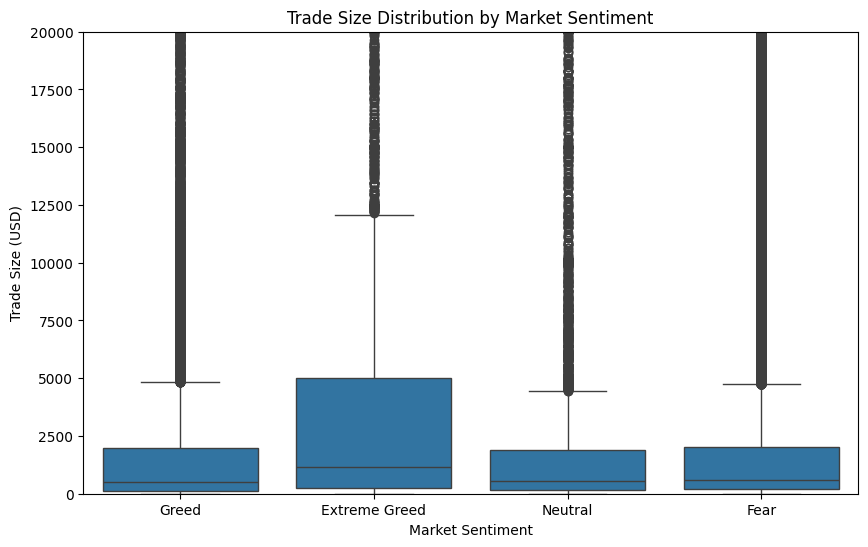

In [292]:
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='Size USD', data=df)
plt.title("Trade Size Distribution by Market Sentiment")
plt.ylabel("Trade Size (USD)")
plt.xlabel("Market Sentiment")
plt.ylim(0, 20000)  # optional: limit y-axis to focus on most trades
plt.show()


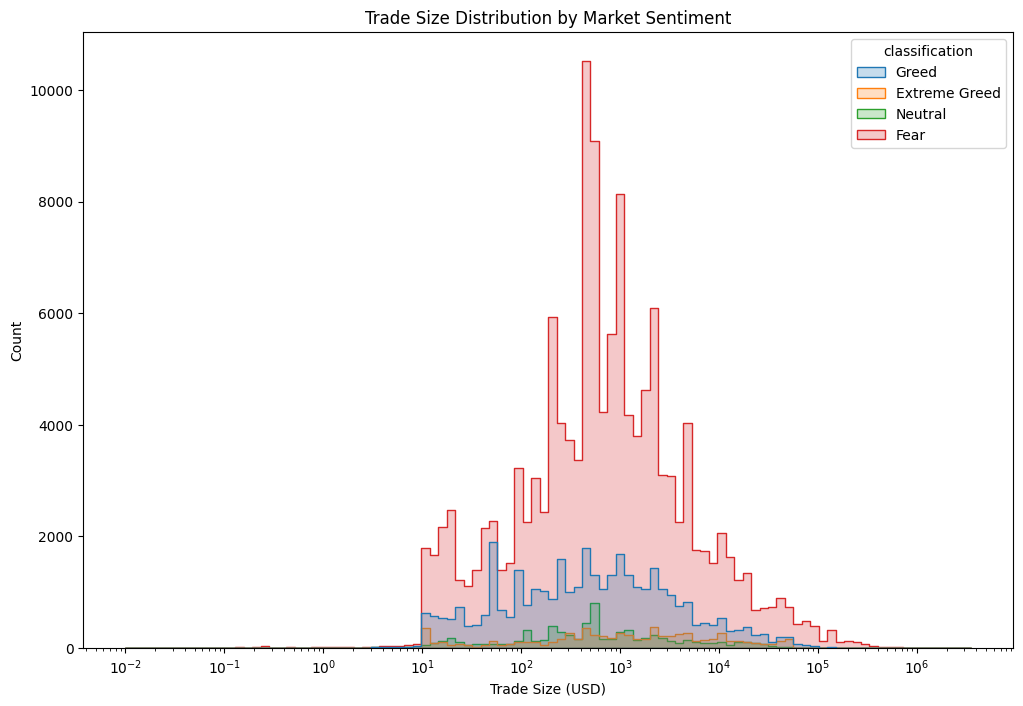

In [293]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Size USD', hue='classification', bins=100, element='step', log_scale=(True, False))
plt.title("Trade Size Distribution by Market Sentiment")
plt.xlabel("Trade Size (USD)")
plt.show()


In [294]:
direction_bias=df.groupby('classification')['Direction'].value_counts(normalize=True)
print("\nTrading Direction Bias:")
print(direction_bias)


Trading Direction Bias:
classification  Direction           
Extreme Greed   Close Long              0.343149
                Close Short             0.277363
                Open Long               0.192330
                Open Short              0.160011
                Buy                     0.012640
                Sell                    0.010773
                Long > Short            0.001867
                Short > Long            0.001867
Fear            Open Long               0.282571
                Close Long              0.273061
                Open Short              0.175333
                Close Short             0.151131
                Buy                     0.059587
                Sell                    0.057421
                Short > Long            0.000321
                Spot Dust Conversion    0.000299
                Long > Short            0.000269
                Settlement              0.000007
Greed           Sell                    0.270964
       

##### Extreme Greed:
- Most trades are closing existing positions (long & short ~62%).
- Traders tend to close longs (34%) more than open new longs (19%) in this sentiment.
- Suggests people are taking profits on longs when sentiment is “Extreme Greed”.
##### Fear:
- Traders open more new positions (both longs and shorts).
- Balance between long entries and long exits.
- Higher buy/sell spot activity (~12%) compared to other sentiments.
##### Greed:
- Very balanced between buy/sell activity and position opens/closes.
- Notice Sell is the single biggest category (27%) → traders may be de-risking when market shows Greed.
##### Neutral:
- Traders heavily favor short positions (59% short-related vs ~25% long-related).
- Suggests bias toward bearish positioning when market sentiment is Neutral.

### Sumarry
- Extreme Greed → traders mostly close longs (take profits) rather than open new positions.
- Fear → traders are more balanced, with more new long openings (buy-the-dip mentality).
- Greed → strong selling activity dominates.
- Neutral → short bias is very strong, traders expect downside or hedge risk.

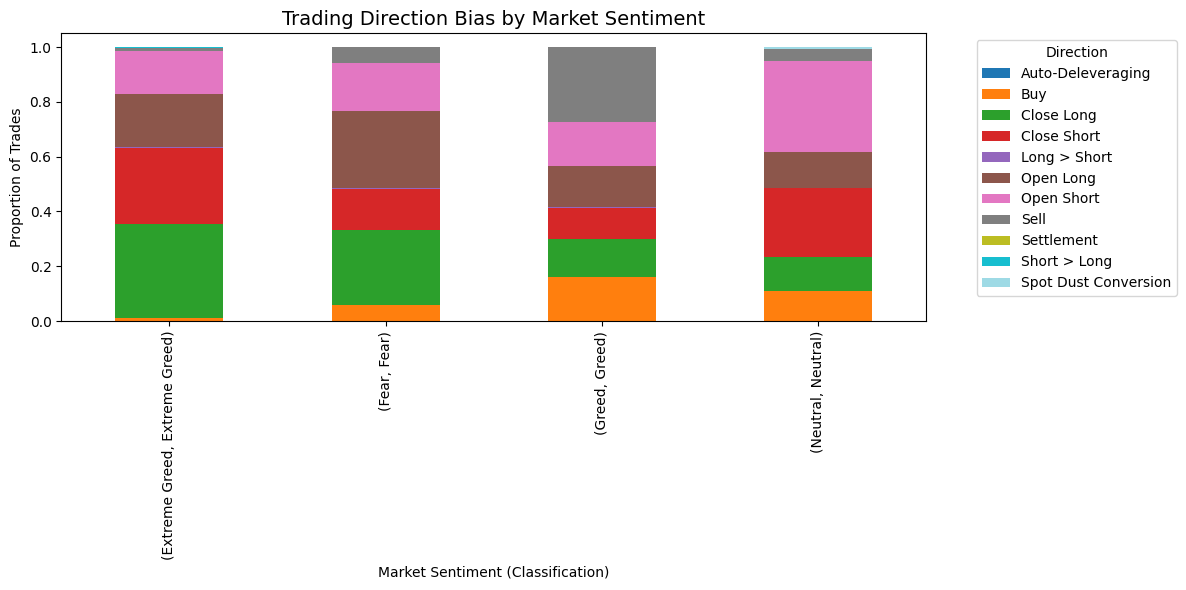

In [295]:
pivot_df = df.groupby(['classification', 'Direction']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack(fill_value=0)
pivot_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Trading Direction Bias by Market Sentiment", fontsize=14)
plt.xlabel("Market Sentiment (Classification)")
plt.ylabel("Proportion of Trades")
plt.legend(title="Direction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [296]:
opening_trades = df[df['Start Position'] == 0] 
side_bias = opening_trades.groupby('classification')['Side'].value_counts(normalize=True)
print("\nOpening Trade Side Bias:")
print(side_bias)


Opening Trade Side Bias:
classification  Side
Extreme Greed   BUY     0.589852
                SELL    0.410148
Fear            SELL    0.553454
                BUY     0.446546
Greed           SELL    0.505190
                BUY     0.494810
Neutral         SELL    0.595652
                BUY     0.404348
Name: proportion, dtype: float64


#### Extreme Greed
- BUY = 58.9%, SELL = 41.0%
- Traders lean towards buying (long bias) when sentiment is extreme greed.
#### Fear
- SELL = 55.3%, BUY = 44.6%
- Traders lean short when market sentiment is fear.
#### Greed
- SELL = 50.5%, BUY = 49.5%
- Almost balanced — no strong bias, slight tilt to selling.
#### Neutral
- SELL = 59.6%, BUY = 40.4%
- Strong short-selling bias in neutral sentiment.
### Analysis:
- Extreme Greed → traders mostly open long trades (optimistic / bullish).
- Fear & Neutral → traders mostly open short trades (pessimistic / bearish).
- Greed → market is balanced between buys and sells.

#  Risk & Activity Analysis

In [297]:
trades_per_day=df.groupby(['Date','classification']).size().reset_index(name='dailytrades')
average_trade=trades_per_day.groupby('classification')['dailytrades'].mean()
print("Average Daily Trades by Sentiment:")
print(average_trade)

Average Daily Trades by Sentiment:
classification
Extreme Greed      6962.000000
Fear             133871.000000
Greed             12096.333333
Neutral            7141.000000
Name: dailytrades, dtype: float64


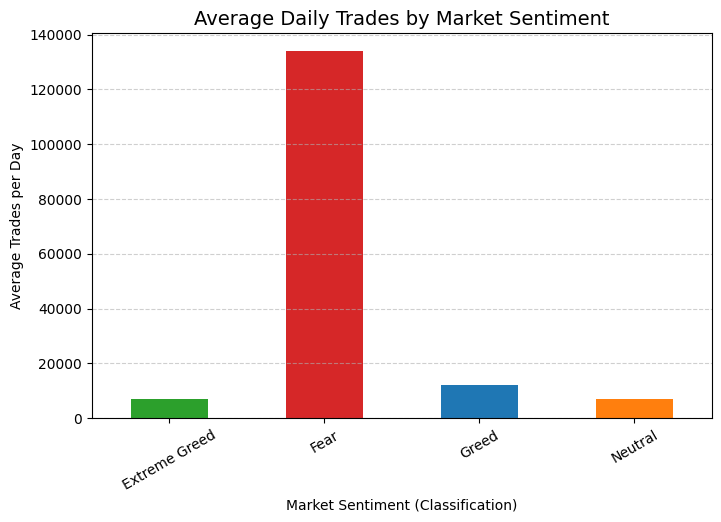

In [298]:
plt.figure(figsize=(8,5))
average_trade.plot(kind='bar', color=['#2ca02c','#d62728','#1f77b4','#ff7f0e'])

plt.title("Average Daily Trades by Market Sentiment", fontsize=14)
plt.ylabel("Average Trades per Day")
plt.xlabel("Market Sentiment (Classification)")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# Average Daily Trades by Market Sentiment
**Fear → 133,871 trades/day**  
- **Huge spike in trading activity**  
- Traders are very active when market sentiment is fearful (panic trading, hedging, selling, and opportunistic buying)

**Greed → 12,096 trades/day**  
- Healthy trading volume, but much lower than Fear

**Extreme Greed → 6,962 trades/day**  
- Activity drops — fewer trades compared to Greed/Fear  
- Could indicate that in euphoric markets, traders are already positioned and don't trade as often

**Neutral → 7,141 trades/day**  
- Similar to Extreme Greed — low trading activity  
- Suggests "wait-and-see" behavior

## Analysis
- **Fear sentiment has the highest trading activity by far** → market participants trade more aggressively during fear (panic-driven volume)
- **Greed has moderate activity**, while Extreme Greed and Neutral have low activity
- **Traders appear to be most reactive in fearful conditions** and least reactive in neutral/euphoric conditions

In [299]:
df.head(2)

,value,classification,Date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Date_Time,is_profitable
0,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.0,0.0,2023-03-28 10:40:00,False
1,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.0,0.0,2023-03-28 10:40:00,False


In [300]:
coin_activity=df.groupby('Coin')['classification'].size().sort_values(ascending=False)
print("\nMost Traded Coins by Sentiment:")
most_coin=coin_activity.head(10)
print(coin_activity.head(10))


Most Traded Coins by Sentiment:
Coin
HYPE         62446
@107         27385
BTC          20135
ETH          10862
SOL           8523
FARTCOIN      3431
MELANIA       3322
PURR/USDC     2769
SUI           1847
XRP           1774
Name: classification, dtype: int64


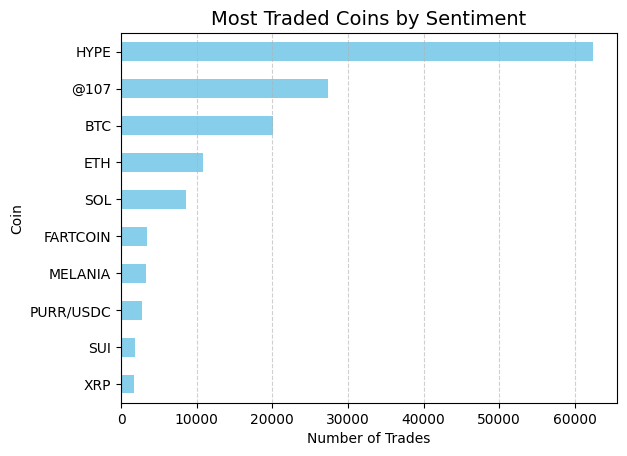

In [301]:
most_coin.plot(kind='barh', color='skyblue')
plt.title("Most Traded Coins by Sentiment", fontsize=14)
plt.xlabel("Number of Trades")
plt.ylabel("Coin")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

#### Analysis :
- Traders in this dataset are not just focused on BTC/ETH → speculative/meme coins (like HYPE, @107, FARTCOIN) dominate trade counts.
- This shows a sentiment-driven trading behavior: when sentiment shifts, traders flock into hype/meme tokens far more aggressively than into majors like BTC or ETH.

# Fee Analysis (Cost of Trading)

In [302]:
df.Fee

0          0.000000
1          0.000000
2          0.000000
3          0.275027
4          0.483987
            ...    
184258     0.055176
184259     0.100200
184260     0.052504
184261     0.057982
184262    23.753812
Name: Fee, Length: 184263, dtype: float64

In [303]:
fees_by_sentiment = df.groupby('classification')['Fee'].agg(['mean', 'sum'])
print("Trading Fees by Sentiment:")
print(fees_by_sentiment)

Trading Fees by Sentiment:
                    mean            sum
classification                         
Extreme Greed   0.978567    6812.781233
Fear            1.083267  145018.043618
Greed           0.670562   24334.033389
Neutral         1.224461    8743.877486


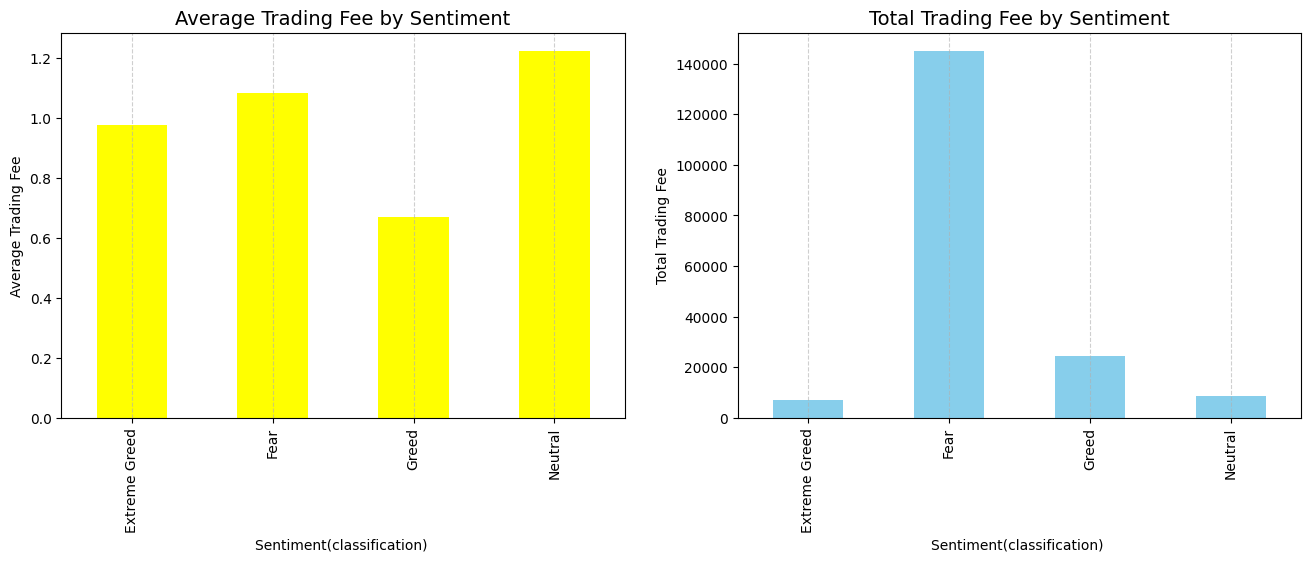

In [304]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
fees_by_sentiment['mean'].plot(kind='bar', color=['yellow'])
plt.title("Average Trading Fee by Sentiment", fontsize=14)
plt.xlabel("Sentiment(classification) ")
plt.ylabel("Average Trading Fee")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.subplot(1,2,2)
fees_by_sentiment['sum'].plot(kind='bar', color=['skyblue'])
plt.xlabel("Sentiment(classification) ")
plt.ylabel("Total Trading Fee")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.title("Total Trading Fee by Sentiment", fontsize=14)
plt.show()


### Analysis: 
- Fear sentiment = fee explosion → traders panic, trade more often, and rack up the most fees overall.
- Greed sentiment = cost-efficient trading (lowest average fees).
- Neutral sentiment = few trades, but higher per-trade fees (maybe due to larger order sizes or higher-cost venues).
- Extreme Greed is moderate both in total and average fees.

In [305]:
df.head(2)

,value,classification,Date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Date_Time,is_profitable
0,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.0,0.0,2023-03-28 10:40:00,False
1,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.0,0.0,2023-03-28 10:40:00,False


# Performance by Coin & Sentiment:

### Best Performing Coins by Sentiment

In [306]:
coin_performance=df.groupby(['classification','Coin'])['Closed PnL'].mean().sort_values(ascending=False)
print("Best Performing Coins by Sentiment:")
print(coin_performance.head(10))

Best Performing Coins by Sentiment:
classification  Coin 
Greed           ZRO      1572.416058
Fear            DOGE      363.970027
                ENA       314.072349
                AVAX      303.037937
                @109      299.250918
Greed           @85       282.778663
                ME        276.702671
Fear            ETH       269.038782
Extreme Greed   kSHIB     250.277398
Greed           EIGEN     218.192070
Name: Closed PnL, dtype: float64


**Greed**
- **ZRO** gave the highest average closed PnL (≈ 1,572)

**Fear**
- **DOGE, ENA, and AVAX** were strong performers (positive PnL)

**Extreme Greed**
- **kSHIB** stood out (≈ 250 profit)

**Different coins become profitable under different sentiment states.**

✅ This shows where traders tend to win more often, depending on the market mood.

### Worst Performing Coins by Sentiment

In [307]:
coin_down=df.groupby(['classification','Coin'])['Closed PnL'].mean().sort_values(ascending=True)
print("Worst performing coins by Sentiment:")
print(coin_down.head(10))

Worst performing coins by Sentiment:
classification  Coin
Fear            @135   -5981.363990
                @83     -261.197427
Extreme Greed   AAVE    -114.932239
Neutral         IO      -103.202296
Extreme Greed   STRK    -100.550625
Greed           CRV      -92.278771
Extreme Greed   ZEN      -87.788235
Fear            ADA      -87.260394
                @147     -70.126539
                S        -60.033651
Name: Closed PnL, dtype: float64


**Fear**
- **@135** caused massive losses (≈ -5,981)
- **@83** and **ADA** dragged down performance

**Extreme Greed**
- **AAVE** and **STRK** underperformed badly

**Neutral**
- **IO** gave negative returns

**Greed**
- **CRV** showed losses

❌ This highlights coins that perform poorly under certain sentiment conditions, possibly due to over-trading, volatility, or hype-driven traps.


## Analysis
- **Sentiment drives which coins perform well or poorly**
- **In Greed**: traders tend to profit from coins like ZRO, ME, and EIGEN
- **In Fear**: safer/larger caps like DOGE and ETH still do well
- **In Extreme Greed**: meme-style/speculative coins like kSHIB spike, but others (AAVE, STRK) perform badly
- **In Neutral**: some lesser coins underperform (IO)

This analysis provides **sentiment-conditioned coin performance rankings** — useful for strategy building (e.g., avoid AAVE in extreme greed, look for DOGE in fear).

# Identify Top/Bottom Performers

In [308]:
trader_stats = df.groupby('Account').agg({
    'Closed PnL': ['sum', 'mean', 'count'],
    'is_profitable': 'mean',
    'Size USD': 'mean',
    'Date':'min'
}).round(2)

trader_stats.columns= ['Total_PnL', 'Avg_PnL', 'Trade_Count', 'Win_Rate', 'Avg_Trade_Size','First_Trade_Date']
trader_stats = trader_stats.sort_values('Total_PnL', ascending=False)
top_10_traders=trader_stats.head(10).index.to_list()
print("Top 10 Traders by Total PnL:")
trader_stats.head(10)

Top 10 Traders by Total PnL:


,Total_PnL,Avg_PnL,Trade_Count,Win_Rate,Avg_Trade_Size,First_Trade_Date
Account,,,,,,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,2040922.43,141.63,14410,0.34,3879.32,2023-11-14
0x083384f897ee0f19899168e3b1bec365f52a9012,1600229.82,419.13,3818,0.36,16159.58,2024-10-27
0xbaaaf6571ab7d571043ff1e313a9609a10637864,940157.21,44.37,21190,0.47,3210.78,2025-02-19
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,811182.98,22.20,36534,0.43,1862.80,2024-10-27
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,674404.00,163.14,4134,0.49,8954.38,2024-10-27
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,425815.20,375.50,1134,0.45,9561.08,2024-10-27
0x430f09841d65beb3f27765503d0f850b8bce7713,416541.87,396.33,1051,0.57,2580.50,2024-03-09
0x513b8629fe877bb581bf244e326a047b249c4ff1,403501.65,67.25,6000,0.40,27373.69,2024-10-27
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,393683.01,289.90,1358,0.28,2179.49,2024-10-27


In [309]:
top_10_traders

['0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23',
 '0x083384f897ee0f19899168e3b1bec365f52a9012',
 '0xbaaaf6571ab7d571043ff1e313a9609a10637864',
 '0xbee1707d6b44d4d52bfe19e41f8a828645437aab',
 '0x4acb90e786d897ecffb614dc822eb231b4ffb9f4',
 '0x72743ae2822edd658c0c50608fd7c5c501b2afbd',
 '0x430f09841d65beb3f27765503d0f850b8bce7713',
 '0x513b8629fe877bb581bf244e326a047b249c4ff1',
 '0x72c6a4624e1dffa724e6d00d64ceae698af892a0',
 '0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4']

In [310]:
top_traders_data=df[df['Account'].isin(top_10_traders)]

In [321]:
top_traders_data.head(2)

,value,classification,Date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Date_Time,is_profitable
3,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,2023-11-14 22:13:20,False
4,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,2023-11-14 22:13:20,False


In [322]:
top_traders_data['hour'] = top_traders_data['Date_Time'].dt.hour
top_traders_data['day_of_week'] = top_traders_data['Date_Time'].dt.day_name()
top_traders_data['month'] = top_traders_data['Date_Time'].dt.month
top_traders_data['is_opening_trade'] = top_traders_data['Start Position'] == 0

C:\Users\Acer.DESKTOP-TSARLU6\AppData\Local\Temp\ipykernel_31664\2457153989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_traders_data['hour'] = top_traders_data['Date_Time'].dt.hour
C:\Users\Acer.DESKTOP-TSARLU6\AppData\Local\Temp\ipykernel_31664\2457153989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_traders_data['day_of_week'] = top_traders_data['Date_Time'].dt.day_name()
C:\Users\Acer.DESKTOP-TSARLU6\AppData\Local\Temp\ipykernel_31664\2457153989.py:3: SettingWithCopyWarning: 
A valu

In [336]:
trader_stats_low = trader_stats.sort_values('Total_PnL', ascending=True)
worst_10_traders=trader_stats_low.head(10).index.to_list()
print("Top 10 Traders by Total PnL:")
trader_stats_low.head(10)

Top 10 Traders by Total PnL:


,Total_PnL,Avg_PnL,Trade_Count,Win_Rate,Avg_Trade_Size,First_Trade_Date
Account,,,,,,
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-27704.57,-44.90,617,0.29,1894.04,2023-03-28
0x39cef799f8b69da1995852eea189df24eb5cae3c,14456.92,4.03,3589,0.33,4790.58,2024-10-27
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f,14781.44,9.51,1554,0.45,3643.36,2025-02-19
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb,21758.83,40.75,534,0.32,8330.19,2024-10-27
0xb899e522b5715391ae1d4f137653e7906c5e2115,22488.50,4.65,4838,0.44,22504.56,2025-02-19
0xae5eacaf9c6b9111fd53034a602c192a04e082ed,29677.26,79.78,372,0.41,3233.53,2024-10-27
0x271b280974205ca63b716753467d5a371de622ab,31763.09,27.72,1146,0.43,10908.18,2024-07-03
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,37706.17,9.79,3853,0.44,1759.74,2024-10-27
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,53496.25,161.13,332,0.48,3445.47,2024-10-27


## Hourly Trading Patterns

In [329]:
hourly_activity=top_traders_data.groupby('hour').agg({'Closed PnL':'mean','Account':'count'}).rename(columns={'Account': 'trade_count'})
print("Top Performers - Hourly Trading Patterns:")
print(hourly_activity.sort_values('trade_count', ascending=False))

Top Performers - Hourly Trading Patterns:
      Closed PnL  trade_count
hour                         
21     69.488920        75587
3     174.573934        13844
16     30.692825         6205
9     109.667962         1898
22      0.149092         1043


## 🏆 Top Performers

**Hour 21 (9 PM)**
- **Most active** → ~75k trades
- **Moderate profit**

**Hour 3 (3 AM)**
- **Less activity** (~13k trades) 
- **Highest profit** (+174)

**Hour 9 (9 AM)**
- **Low activity** (~1.9k trades)
- **Strong profit** (+110)

**Hour 16 (4 PM)**
- **Moderate volume**
- **Small profit**

**Hour 22 (10 PM)**
- **Some trades**
- **Almost no profit**

👉 *Top performers can find profits almost everywhere, but they shine especially during quiet hours (3 AM, 9 AM) when competition is low.*


In [338]:
worst_trader_data=df[df['Account'].isin(worst_10_traders)]

In [340]:
worst_trader_data['hour'] = worst_trader_data['Date_Time'].dt.hour
worst_trader_data['day_of_week'] = worst_trader_data['Date_Time'].dt.day_name()
worst_trader_data['month'] = worst_trader_data['Date_Time'].dt.month
worst_trader_data['is_opening_trade'] = worst_trader_data['Start Position'] == 0

C:\Users\Acer.DESKTOP-TSARLU6\AppData\Local\Temp\ipykernel_31664\1140629550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worst_trader_data['hour'] = worst_trader_data['Date_Time'].dt.hour
C:\Users\Acer.DESKTOP-TSARLU6\AppData\Local\Temp\ipykernel_31664\1140629550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worst_trader_data['day_of_week'] = worst_trader_data['Date_Time'].dt.day_name()
C:\Users\Acer.DESKTOP-TSARLU6\AppData\Local\Temp\ipykernel_31664\1140629550.py:3: SettingWithCopyWarning: 
A 

In [341]:
low_hourly_activity=worst_trader_data.groupby('hour').agg({'Closed PnL':'mean','Account':'count'}).rename(columns={'Account': 'trade_count'})
print("Worst Performers - Hourly Trading Patterns:")
print(low_hourly_activity.sort_values('trade_count', ascending=False))

Worst Performers - Hourly Trading Patterns:
      Closed PnL  trade_count
hour                         
21      8.301218        17505
3     115.044175         1069
9       2.526527           85
16   -206.074672           27
10      0.000000            3
22      0.000000            2


## ❌ Worst Performers

**Hour 21 (9 PM)**
- **Also trade heavily** (~17k trades)
- **Tiny profits** (+8) vs top performers (+69)

**Hour 3 (3 AM)**
- **Do okay** (+115)
- **Still below top performers** (+174)

**Hour 16 (4 PM)**
- **Big losses** (-206) → worst time for poor traders

**Hour 9 (9 AM)**
- **Barely profitable** (+2.5) vs top performers (+110)

**Hours 10 & 22**
- **Essentially irrelevant** — very few trades, no gains

👉 *Worst performers struggle in the same hours where top traders profit. Especially bad at 4 PM (16h) where they lose big.*


## Analysis:
**Top performers:**
- Profit consistently, especially in low-volume hours (3 AM, 9 AM)
- Thrive when others stay out

**Worst performers:**
- Lose during the same windows, especially 16:00
- Their "edge" is missing — maybe chasing bad setups

**Crowded hour (21h) analysis:**
- Both trade heavily
- Top performers extract value
- Worst performers barely break even

## 💡 Key Conclusions

- **Timing matters differently depending on skill**
- **Just following the crowd** (like trading at 9 PM) doesn't guarantee success — skill separates winners from losers
- **16:00 (4 PM) is a danger zone** for poor traders

In [343]:
daily_patterns = top_traders_data.groupby('day_of_week').agg({
    'Closed PnL': 'mean',
    'is_profitable': 'mean',
    'Account': 'count'
}).rename(columns={'Account': 'trade_count', 'is_profitable': 'win_rate'})
print("\nTop Performers - Daily Trading Patterns:")
print(daily_patterns)


Top Performers - Daily Trading Patterns:
             Closed PnL  win_rate  trade_count
day_of_week                                   
Saturday      30.692825  0.512329         6205
Sunday       174.573934  0.540306        13844
Tuesday        0.149092  0.275168         1043
Wednesday     70.473108  0.442499        77485


# Weekly Trading Performance Analysis

## 📈 Day-by-Day Performance

### Saturday
- **Average profit**: ≈ 30.7
- **Win rate**: ≈ 51% (slightly better than coin toss)
- **Trades**: 6,205
-  Trading is steady but not very high-volume

### Sunday
- **Highest average profit**: ≈ 174.6
- **Highest win rate**: ≈ 54%
- **Trades**: 13,844
- ✅ **Sunday is the strongest day for top performers** → fewer trades than Wednesday, but much more profitable & higher accuracy

### Tuesday
- **Average profit**: ≈ 0.15 (basically flat)
- **Very low win rate**: ≈ 27.5% (most trades are losses)
- **Very few trades**: 1,043
-  **Clearly a bad day for top performers**

### Wednesday
- **Moderate profit**: ≈ 70.5
- **Win rate**: ≈ 44% (below 50%)
- **Huge trade volume**: 77,485 trades!
- ⚖️ This means **Wednesday is the busiest day, but less profitable than Sunday**

##  Overall Insights

- **Sunday is the sweet spot** → Top performers trade less but earn much higher profits and win rates
- **Wednesday is overtraded** → Many trades, but efficiency (win rate & PnL) drops
- **Tuesday is a danger zone** → Low profits and low win rate → avoid
- **Saturday is okay** → Consistent but smaller gains

##  Key Conclusion

👉 **Top traders don't just trade all days equally** — their edge shows more on weekends (especially Sunday), while midweek (Tuesday/Wednesday) seems riskier.

In [344]:
# When do they buy vs sell in different sentiment regimes?
sentiment_timing = top_traders_data.groupby(['classification', 'hour', 'Side']).agg({
    'Closed PnL': 'mean',
    'Account': 'count'
}).rename(columns={'Account': 'trade_count'})

print("\nTop Performers - Trading by Sentiment & Hour:")
print(sentiment_timing.sort_values(['classification', 'trade_count'], ascending=[True, False]))


Top Performers - Trading by Sentiment & Hour:
                          Closed PnL  trade_count
classification hour Side                         
Extreme Greed  16   SELL   35.921150         3195
                    BUY    25.143158         3010
Fear           21   SELL   59.419271        38927
                    BUY    80.181261        36660
Greed          3    SELL  246.432109         9399
                    BUY    22.629056         4445
               22   SELL    3.506983          554
                    BUY    -3.655144          489
Neutral        9    BUY    44.352809         1025
                    SELL  186.355285          873


## 📊 Performance by Sentiment and Hour

### 🟡 Extreme Greed (Hour 16 / 4 PM)
- **SELL**: +35.9 profit
- **BUY**: +25.1 profit
- **Balanced trade count** (~3k each)
- 👉 In extreme greed, both directions work around 4 PM, with **SELL slightly better**

### 😨 Fear (Hour 21 / 9 PM)
- **Huge trade volume**: 38k SELLs and 36k BUYs
- **Both sides profitable** → BUY (+80) outperforms SELL (+59)
- 👉 **Fear sentiment at 9 PM is the most active and consistently profitable zone**

### 🟢 Greed

**Hour 3 (3 AM):**
- **SELLs are hugely profitable** (+246) vs BUYs (+22)
- **Trade count much higher on SELL side** (~9.3k vs 4.4k)
- ✅ **Best opportunity here is shorting (SELL) during greed sentiment at 3 AM**

**Hour 22 (10 PM):**
- **SELL is barely profitable** (+3.5)
- **BUY actually loses** (-3.6)
- ❌ **Greed sentiment at 10 PM is a weak trading time**

### ⚪ Neutral (Hour 9 / 9 AM)
- **Both directions profitable**
- **SELL (+186) far outperforms BUY** (+44)
- 👉 **In neutral sentiment at 9 AM, shorting works best**

## 📌 Overall Insights

- **Fear at 21:00 (9 PM)** → Very high volume + both BUY/SELL profitable, but **BUY slightly stronger**
- **Greed at 3:00 (3 AM)** → **SELLs dominate, massive profits**
- **Neutral at 9:00 (9 AM)** → **SELLs again dominate strongly**
- **Extreme Greed at 16:00 (4 PM)** → **Balanced**, both BUY & SELL give steady profits
- **Greed at 22:00 (10 PM)** → **Worst slot**, weak or negative returns

## 💡 Strategic Implications

👉 This shows how the **best performers adjust not only to sentiment, but also to hour and side**. They know exactly when to be long vs short depending on context.

In [ ]:
# Analyze each top trader individually
for i, trader in enumerate(top_10_traders[:5]):  # Look at top 5
    trader_data = top_traders_data[top_traders_data['Account'] == trader]
    
    print(f"\n{'='*50}")
    print(f"TOP TRADER #{i+1}: {trader}")
    print(f"Total PnL: ${trader_stats.loc[trader, 'Total_PnL']:,.2f}")
    print(f"Win Rate: {trader_stats.loc[trader, 'Win_Rate']:.1%}")
    print(f"Total Trades: {trader_stats.loc[trader, 'Trade_Count']}")
    fav_hours = trader_data['hour'].value_counts().head(3)
    print(f"Favorite Trading Hours: {list(fav_hours.index)}")
    sentiment_pref = trader_data['classification'].value_counts(normalize=True)
    print("Sentiment Preference:")
    for sentiment, freq in sentiment_pref.items():
        print(f"  {sentiment}: {freq:.1%}")
    side_ratio = trader_data['Side'].value_counts(normalize=True)
    print("Buy/Sell Ratio:")
    for side, freq in side_ratio.items():
        print(f"  {side}: {freq:.1%}")


TOP TRADER #1: 0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23
Total PnL: $2,040,922.43
Win Rate: 34.0%
Total Trades: 14410
Favorite Trading Hours: [21, 16, 9]
Sentiment Preference:
  Fear: 51.2%
  Extreme Greed: 21.3%
  Greed: 16.0%
  Neutral: 11.4%
Buy/Sell Ratio:
  SELL: 53.9%
  BUY: 46.1%

TOP TRADER #2: 0x083384f897ee0f19899168e3b1bec365f52a9012
Total PnL: $1,600,229.82
Win Rate: 36.0%
Total Trades: 3818
Favorite Trading Hours: [21, 3]
Sentiment Preference:
  Fear: 87.9%
  Greed: 12.1%
Buy/Sell Ratio:
  SELL: 55.2%
  BUY: 44.8%

TOP TRADER #3: 0xbaaaf6571ab7d571043ff1e313a9609a10637864
Total PnL: $940,157.21
Win Rate: 47.0%
Total Trades: 21190
Favorite Trading Hours: [21]
Sentiment Preference:
  Fear: 100.0%
Buy/Sell Ratio:
  BUY: 52.8%
  SELL: 47.2%

TOP TRADER #4: 0xbee1707d6b44d4d52bfe19e41f8a828645437aab
Total PnL: $811,182.98
Win Rate: 43.0%
Total Trades: 36534
Favorite Trading Hours: [21, 3]
Sentiment Preference:
  Fear: 72.9%
  Greed: 27.1%
Buy/Sell Ratio:
  SELL: 57.1%
  BUY: 

# Top Trader Profile Analysis

## 🎯 Common Winning Patterns

### 😨 Fear Dominates
- **Every top trader makes most of their money in Fear sentiment markets** (70–100%)

### ⏰ Strategic Timing
- **Strongest hours are 21:00 (9 PM) and 3:00 (3 AM)**

### 📉 SELL Bias
- **Most lean slightly bearish** (more shorts than longs)

### 💰 Risk Management Excellence
- **Low win rates, big profits** → Many win less than 40% of the time but still rack up profits
- **Means they cut losses fast and ride winners big**

## 🎭 Different Trading Styles

- **High-frequency grinders** (#3, #4)
- **Low-volume specialists** (#2, #5)
- **Balanced all-rounder** (#1) - trades across more moods and hours

## 💡 Key Conclusion

👉 **In short**: Top traders thrive in Fear, prefer evening/night trading, lean short, and don't need high win rates to crush profits.

# Top Traders' Hourly Profitability Analysis

In [347]:
# Which hours are most profitable for top traders?
best_hours = top_traders_data.groupby('hour')['Closed PnL'].mean().sort_values(ascending=False)
print("Most Profitable Trading Hours for Top Performers:")
print(best_hours.head())

Most Profitable Trading Hours for Top Performers:
hour
3     174.573934
9     109.667962
21     69.488920
16     30.692825
22      0.149092
Name: Closed PnL, dtype: float64


## 📈 What This Data Shows

- **Average profit/loss (Closed PnL)** made during each hour of the day by top traders
- **Index (hour)** represents the hour of trade execution (0–23, based on trading timestamp)
- **Values** show the mean Closed PnL per trade in that hour

## 📊 Hourly Performance Breakdown

**Hour 3 → 174.57**
- 🏆 **The most profitable hour on average**

**Hour 9 → 109.66**
- ⭐ **Also very profitable**

**Hour 21 → 69.48**
- ✅ **Good profits but less than 3 & 9**

**Hour 16 → 30.69**
- 📉 **Small average profit**

**Hour 22 → 0.15**
- ⚖️ **Almost break-even, very low profitability**

## 💡 Key Insight

✅ This analysis reveals **when (time of day) top traders usually get the best results** - with early morning hours (3 AM and 9 AM) showing the highest profitability per trade.

## Trading Performance by Sentiment & Hour

In [349]:
sentiment_hour_analysis = top_traders_data.groupby(['classification', 'hour']).agg({
    'Closed PnL': 'mean',
    'is_profitable': 'mean',
    'Size USD': 'mean'
}).round(4)

print("\nSentiment + Hour Analysis:")
print(sentiment_hour_analysis.head(10))


Sentiment + Hour Analysis:
                     Closed PnL  is_profitable    Size USD
classification hour                                       
Extreme Greed  16       30.6928         0.5123   5605.8026
Fear           21       69.4889         0.4459   5269.7071
Greed          3       174.5739         0.5403   3347.5902
               22        0.1491         0.2752  11034.7995
Neutral        9       109.6680         0.3072   2719.9267


## 📊 Performance Analysis

### 🟡 Extreme Greed (16h / 4 PM)
- **Avg. PnL**: 30.69
- **Win rate**: 51% (pretty balanced)
- **Avg. size**: $5,606
- → Traders do okay here, medium profits and average risk size

### 😨 Fear (21h / 9 PM)
- **Avg. PnL**: 69.49
- **Win rate**: 44% (less than half of trades win, but winners are big)
- **Avg. size**: $5,269
- → **Lower win rate, but profitable because wins outweigh losses**

### 🟢 Greed (3h / 3 AM)
- **Avg. PnL**: 174.57 🚀
- **Win rate**: 54%
- **Avg. size**: $3,348
- → **Best combo**: High win rate and highest average profits. Traders love this slot

### 🟢 Greed (22h / 10 PM)
- **Avg. PnL**: 0.15 (basically breakeven)
- **Win rate**: 27% (very low!)
- **Avg. size**: $11,035 (big bets)
- → **Traders risk a lot but usually lose** — bad combo

### ⚪ Neutral (9h / 9 AM)
- **Avg. PnL**: 109.67
- **Win rate**: 30% (low)
- **Avg. size**: $2,720
- → **Even with few wins, those wins are huge enough** to drive up average profit

## ✅ Conclusion

- **Best slot = Greed @ 3 AM** (consistent profits, decent win rate)
- **Worst slot = Greed @ 10 PM** (big risks, small returns)
- **Fear @ 9 PM is also strong** despite low win % → traders make fewer but much bigger winning trades

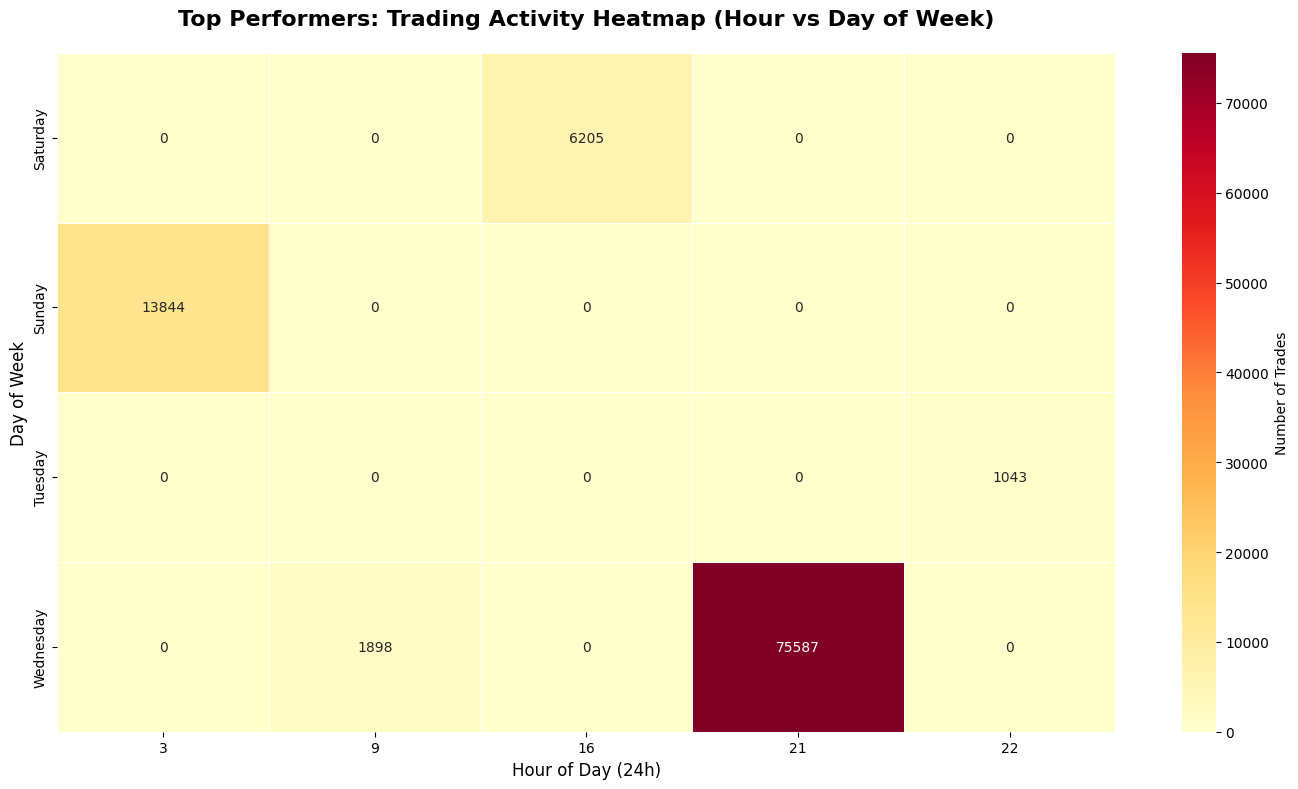

In [353]:
# Create pivot table for heatmap
heatmap_data = top_traders_data.pivot_table(
    index='day_of_week', 
    columns='hour', 
    values='Account', 
    aggfunc='count',
    fill_value=0
)

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data, 
    cmap='YlOrRd', 
    annot=True, 
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Number of Trades'}
)
plt.title('Top Performers: Trading Activity Heatmap (Hour vs Day of Week)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day (24h)', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.show()

#### Heatmap Insight:
- Peak activity hours: 21h
- Most active day: Wednesday
- Total trades by top performers: 98577

In [355]:
df

,value,classification,Date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Date_Time,is_profitable
0,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,0.0000,Open Long,0.000000,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00,False
1,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,0.0967,Open Long,0.000000,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00,False
2,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,0.1791,Open Long,0.000000,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00,False
3,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,0.0000,Open Long,0.000000,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,2023-11-14 22:13:20,False
4,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,0.4933,Open Long,0.000000,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,2023-11-14 22:13:20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184258,44,Fear,2025-02-19,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,4.1300,551.77,BUY,-1797.8800,Close Short,-82.883731,0xbbde0f181b617f8d2e2a0421c9a82a02077000c2d6ba...,87333347541,False,0.055176,6.900000e+14,2025-02-19 21:20:00,False
184259,44,Fear,2025-02-19,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,7.5000,1002.00,BUY,-1793.7500,Close Short,-150.515250,0x6bd337120e6f682326d30421c9a82a02077100566072...,87333347541,False,0.100200,6.610000e+13,2025-02-19 21:20:00,False
184260,44,Fear,2025-02-19,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,3.9300,525.05,BUY,-1786.2500,Close Short,-78.869991,0xdbff44ed44a78acf124c0421c9a82a0207720000b450...,87333347541,False,0.052504,1.010000e+15,2025-02-19 21:20:00,False
184261,44,Fear,2025-02-19,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,4.3400,579.82,BUY,-1782.3200,Close Short,-87.098158,0xd8f4fcfddd57c09658a90421c9a82a0207780007b85e...,87333347541,False,0.057982,2.700000e+13,2025-02-19 21:20:00,False


# Trading Timing & Skill Gap Analysis

In [357]:
df['hour']=df['Date_Time'].dt.hour

In [358]:
hourly_pnl_top = top_traders_data.groupby('hour')['Closed PnL'].mean()
hourly_pnl_all = df.groupby('hour')['Closed PnL'].mean()

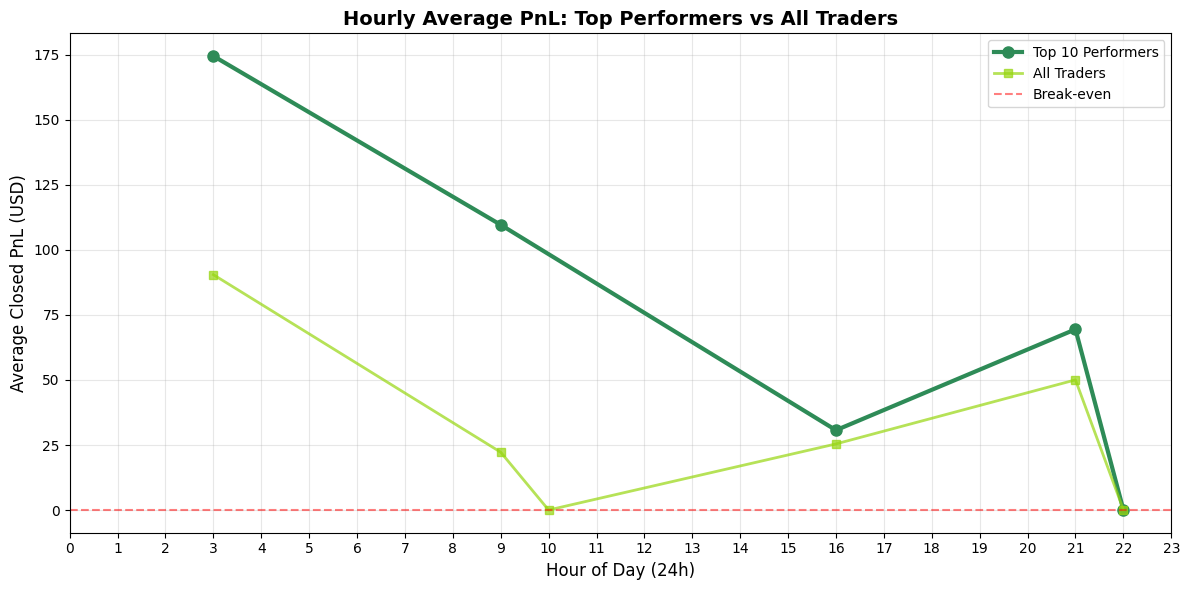

In [360]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_pnl_top.index, hourly_pnl_top.values, 
         marker='o', linewidth=3, markersize=8, label='Top 10 Performers', color='#2E8B57')
plt.plot(hourly_pnl_all.index, hourly_pnl_all.values, 
         marker='s', linewidth=2, markersize=6, label='All Traders', color="#97D610", alpha=0.7)
plt.title('Hourly Average PnL: Top Performers vs All Traders', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day (24h)', fontsize=12)
plt.ylabel('Average Closed PnL (USD)', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Break-even')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


In [365]:
best_hour_top = hourly_pnl_top.idxmax()
best_hour_all = hourly_pnl_all.idxmax()

In [366]:
print(f"Top performers' best hour: {best_hour_top}h (${hourly_pnl_top.max():.2f} avg PnL)")
print(f"All traders' best hour: {best_hour_all}h (${hourly_pnl_all.max():.2f} avg PnL)")

Top performers' best hour: 3h ($174.57 avg PnL)
All traders' best hour: 3h ($90.50 avg PnL)


## 🎯 Key Insights

### ⏰ Top Traders' Timing Advantage
- **Dominate at strategic hours**: 3 AM, 9 AM, 9 PM
- **Better entry execution** during these windows

### 📉 Average Traders' Challenge
- **Follow similar patterns** but with **lower efficiency**
- **Most traders lose out** even when trading the same hours

### 🔍 Skill Gap Evidence
- **Timing overlap reveals** profitable opportunities exist for everyone
- **Only top performers exploit them consistently**

## ✅ Key Takeaway

> If you want to trade like the top performers, the most profitable windows (historically) are **3 AM, 9 AM, and 9 PM**.

**However:** Just trading at these times isn't enough — **strategy & execution quality** are what separate the top 10 from the average trader.